# HW02: Practice with logistic regression and decision tree

Waleed Almousa

908 302 9414

[Please put your name and NetID here.]

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text 

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species ('virginica' or 'versicolor') for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

In [2]:
df= pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/iris.csv")
df2=df[df.Species!="setosa"]
df2=df2[["Petal.Length", "Species"]]
df2.tail()

,Petal.Length,Species
145,5.2,virginica
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica
149,5.1,virginica


In [3]:
model=linear_model.LogisticRegression(C=1000)
X=df2[["Petal.Length"]]
y = (df2['Species'] == 'virginica').to_numpy().astype(int)
model.fit(X, y)
accuracy = model.score(X, y)
print("the accuracy of this model is: ", accuracy)

petal_length_5 = np.array([[5]])
probability_virginica = model.predict_proba(petal_length_5)[:, 1][0]
print("Estimated P(Species=virginica | Petal.Length=5):", probability_virginica)

predicted_species = "virginica" if model.predict(petal_length_5)[0] == 1 else "versicolor"
print("Predicted Species for Petal.Length=5:", predicted_species)
model.predict_proba(X)[:, 1][0]


the accuracy of this model is:  0.93
Estimated P(Species=virginica | Petal.Length=5): 0.772542197656312
Predicted Species for Petal.Length=5: virginica


C:\Users\walee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\walee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.18786064663921054

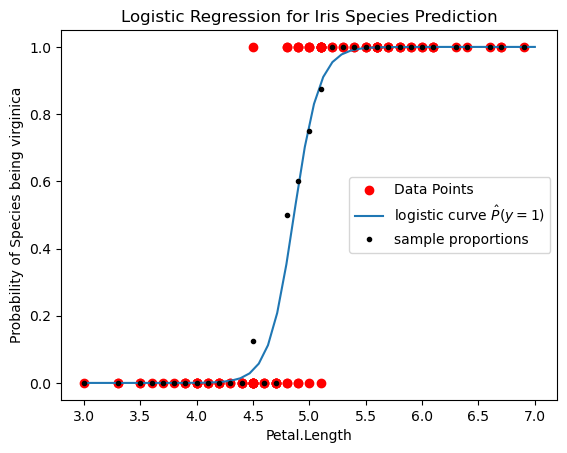

In [4]:
plt.scatter(X, y, color='red', label='Data Points', marker='o')
b = model.intercept_
w = model.coef_[0]
low=3
high=7
x_values, x_counts = np.unique(X, return_counts=True)

xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, label=r'logistic curve $\hat{P}(y = 1)$')


n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[df2["Petal.Length"] == x_values[i]]) / x_counts[i]

plt.plot(x_values, success_proportion_per_x_value, '.', color='black', label='sample proportions')

plt.xlabel('Petal.Length')
plt.ylabel('Probability of Species being virginica')
plt.legend()
plt.title('Logistic Regression for Iris Species Prediction')
plt.legend(loc='center right')
plt.show(block=False)


## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... your Latex math in a Markdown cell here ...

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln \frac{p}{1 - p} & = \ln \frac{\frac{1}{1 + e^{-(\mathbf{w x} + b)}}}{1-\frac{1}{1 + e^{-(\mathbf{w x} + b)}}}\\ 
find\_common\_denominator 
   \\
   & = \ln  \frac{\frac{1}{1 + e^{-(\mathbf{w x} + b)}}}{\frac{1+e^{-(\mathbf{w x} + b)}-1}{1+e^{-(\mathbf{w x} + b)}}}\\
   \\
   & = \ln  \frac{\frac{1}{1 + e^{-(\mathbf{w x} + b)}}}{\frac{e^{-(\mathbf{w x} + b)}}{1+e^{-(\mathbf{w x} + b)}}}\\
   multiple\_fraction\_by\_reciprical \\
   & = \ln( \frac {1}{1+e^{-(\mathbf{w x} + b)}} * \frac{1+e^{-(\mathbf{w x} + b)}}{e^{-(\mathbf{w x} + b)}})
   & \\ 
    & = \ln \frac{1}{e^{-(\mathbf{w x} + b)}}
    & \\
    & = \ln e^{(\mathbf{w x} + b)}
    & \\   
    & = \mathbf{w x} + b\\
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](https://pages.stat.wisc.edu/~jgillett/451/02/toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

# ... Your answer here in a Markdown cell ...
# For example, "1: A, 2: B, 3: C, 4: D" is wrong but has the right format.

1:D , 2: C, 3: A, 4: B


# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

In [5]:
df3= pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv', index_col=0)
df3=df3[["Survived", "Pclass", "Sex", "Age"]]
df3=df3.dropna()
df3["Female"]=df3.Sex=='female'

In [6]:
X= df3[["Pclass", "Age", "Female"]]
y=df3.Survived
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)
print("the trees accuracy is: ", round(clf.score(X, y), 3))
print("the trees max depth is: ", clf.tree_.max_depth)


the trees accuracy is:  0.896
the trees max depth is:  15


the trees accuracy is:  0.791


[Text(0.5, 0.8333333333333334, 'Female <= 0.5\nentropy = 0.974\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'Pclass <= 1.5\nentropy = 0.732\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.969\nsamples = 101\nvalue = [61, 40]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.611\nsamples = 352\nvalue = [299, 53]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\nentropy = 0.804\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.314\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.996\nsamples = 102\nvalue = [55, 47]')]

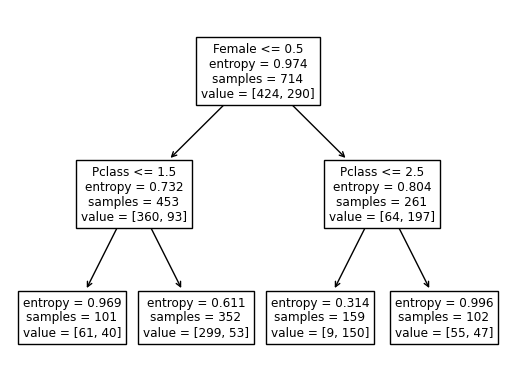

In [7]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf.fit(X, y)
print("the trees accuracy is: ", round(clf.score(X, y), 3))
tree.plot_tree(clf, feature_names=["Pclass", "Age", "Female"])

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.


"Female" and "Pclass" are used in the decision-making 

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Survived`
 column for each subset.

In [8]:
df4=df3[df3.Female==1]
print("The proportion of females that survived is: ", round(np.mean(df4.Survived), 3))
df5=df3[df3.Female==0]
print("The proportion of males that survived is: ", round(np.mean(df5.Survived), 3))


The proportion of females that survived is:  0.755
The proportion of males that survived is:  0.205


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.


$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \\
   & \\
   & Entropy S = {(-1/2)*log2(1/2) -(1/2)*log2(1/2)}
   \\ & =1
    & \\
    & \\   
 \end{align*}
$

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.



the best feature to use is x2, with a threshold of 7.5

(x2, 7.5)

Work: 

S(left): {((2, 6), 0), ((5, 7), 0)}

S(right): {((4, 9), 1), ((3, 8), 1)}

this splits the data into two groups, one with 2 successes and the other with 2 failures. therefor, the best (feature, threshold) split is (x2, 7.5)